<a href="https://colab.research.google.com/github/namnguyenpdx/Fermat-Torricelli-Problem/blob/main/FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

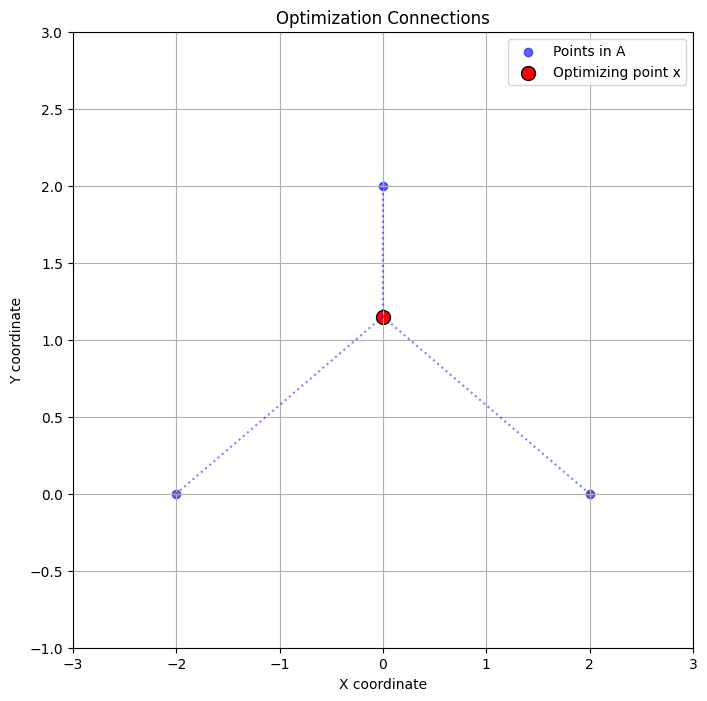

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def fun_val(A, x):
    # The data points are stored in the matrix A
    return np.sum(np.linalg.norm(x - A, axis=1))

def weaksub(A, x):
    # Find a subgradient of f(x)=||x-a1||+...+||x-a_m||
    C = x - A
    N = np.linalg.norm(C, axis=1)
    IndZ = (N == 0)
    N[IndZ] = 1  # Avoid division by zero
    K = C / N[:, np.newaxis]
    return np.sum(K, axis=0)

# Parameters
A = 10 * np.random.rand(100, 2)  # Generating random points
#A = np.array([[-2, 0], [0, 2], [2, 0]])
x = np.array([-5, 5])
N = 500

# Subgradient method
v = [fun_val(A, x)]
for i in range(1, N):
    x = x - 1/i * weaksub(A, x)
    v.append(min(v[-1], fun_val(A, x)))

# Plotting setup
plt.figure(figsize=(8, 8))
for i in range(A.shape[0]):
    plt.plot([x[0], A[i, 0]], [x[1], A[i, 1]], 'b:', alpha=0.5)  # Light blue dashed lines

# Add scatter plot for points and x
plt.scatter(A[:, 0], A[:, 1], c='blue', label='Points in A', alpha=0.6)
plt.scatter(x[0], x[1], c='red', s=100, label='Optimizing point x', edgecolors='black')

# Dynamic plot limits based on data
x_min, x_max = min(A[:, 0].min(), x[0]), max(A[:, 0].max(), x[0])
y_min, y_max = min(A[:, 1].min(), x[1]), max(A[:, 1].max(), x[1])
plt.axis([x_min - 1, x_max + 1, y_min - 1, y_max + 1])

plt.title('Optimization Connections')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()
